# Packages


In [2]:
# 나눔고딕 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings('ignore')

# 나눔고딕 볼드체 폰트 경로
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 나눔고딕 볼드체 폰트 등록
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

## 그래프 다루기

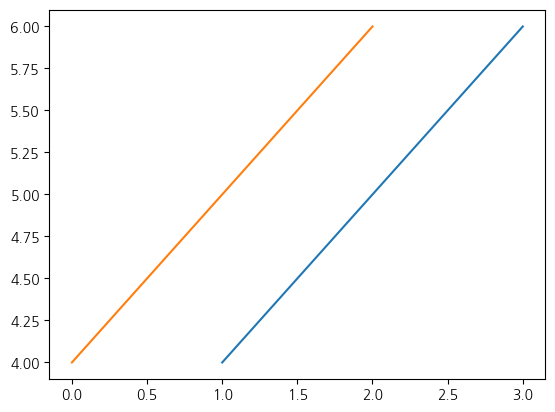

In [7]:
# x가 1,2,3이고 y가 4,5,6인 그래프
x = [1,2,3]
y = [4,5,6]

# 일차선 그래프
plt.plot(x, y)
plt.plot(y) # lineplot은 y 값만 있으면 그림을 그릴 수 잇음
plt.show()

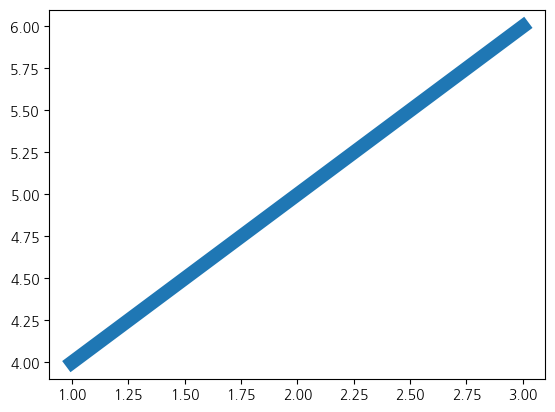

In [9]:
# linewidth를 이용한 선 굵기 조정
plt.plot(x, y, linewidth = 10)
plt.show()

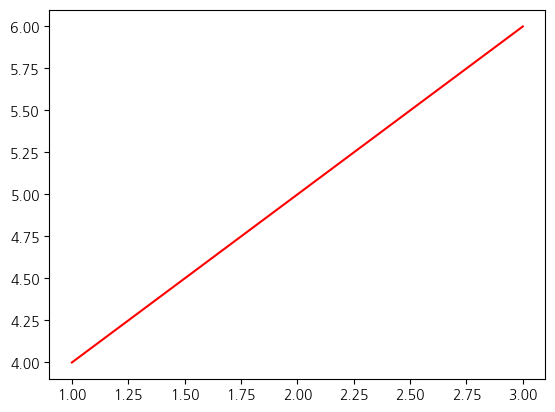

In [10]:
# 색상 조절
plt.plot(x, y, color = 'red')
plt.show()

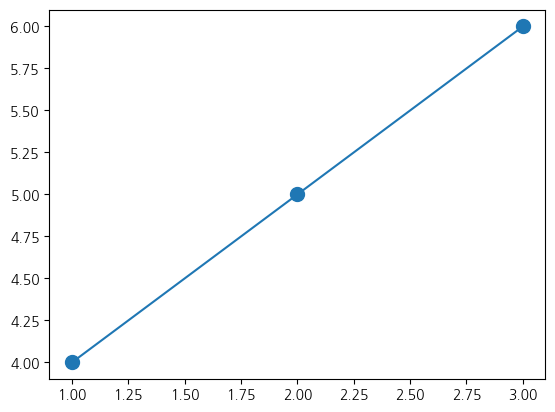

In [13]:
# marker 모형
plt.plot(x, y, marker = 'o', markersize = 10)
plt.show()

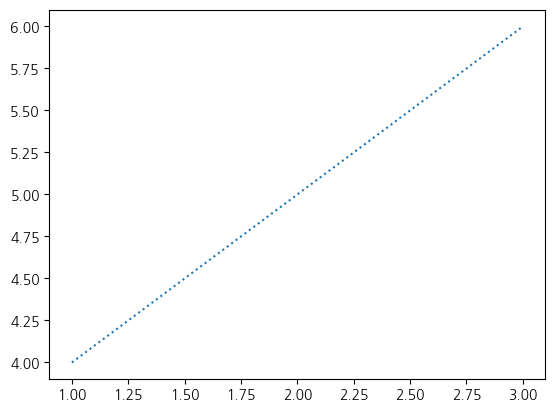

In [14]:
# 선형태 변경
plt.plot(x, y, linestyle = ':')
plt.show()

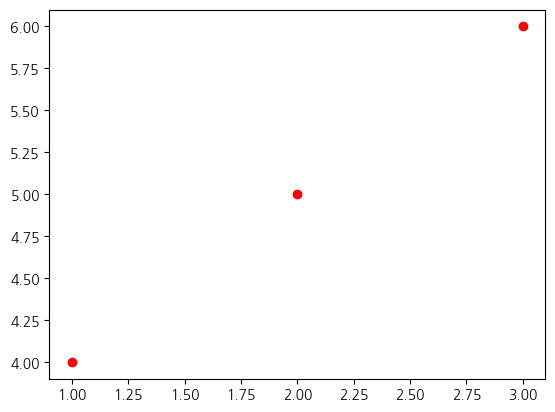

In [16]:
# 점 형태
plt.plot(x, y, 'ro')
plt.show()

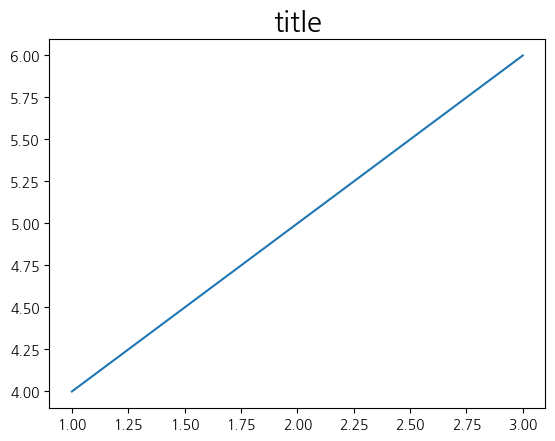

In [29]:
# 그래프 명
plt.plot(x, y)
plt.title('title', fontsize = 20)
plt.show()

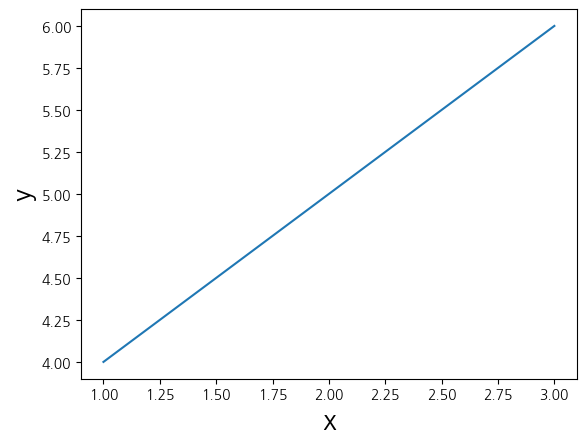

In [19]:
# x축 명, y축 명
plt.plot(x ,y)
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.show()

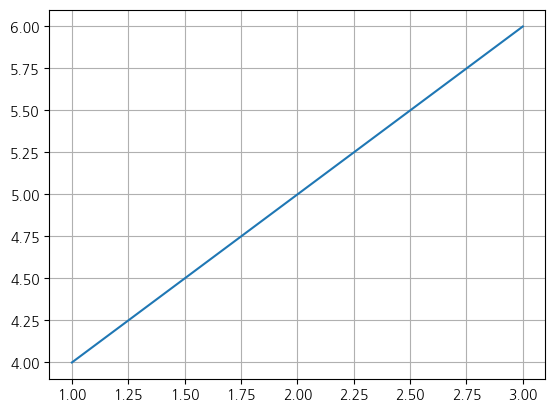

In [20]:
# 그리드 설정
plt.plot(x, y)
plt.grid(True)
# x 축만, y축만
# plt.grid(True , axis ='x')
# plt.gird(True, axis = 'y')
plt.show()

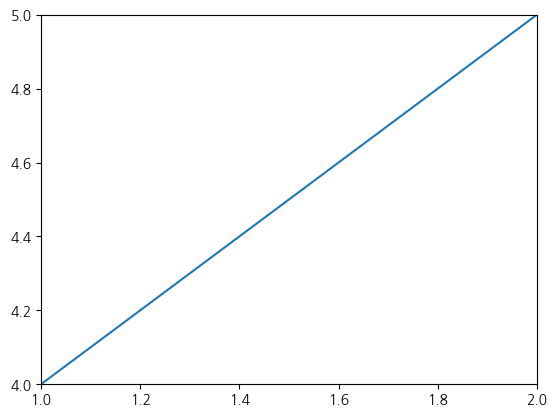

In [21]:
# x,y 범위 설정
plt.plot(x, y)
plt.xlim([1,2])
plt.ylim([4,5])
# plt.axis([1,2,4,5])
plt.show()

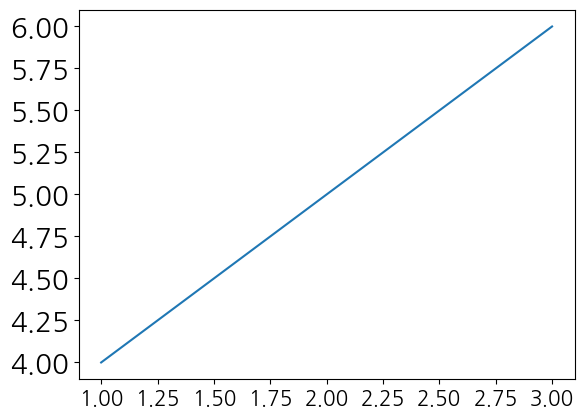

In [24]:
# 눈금 글꼴 크기
plt.plot(x, y)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)
plt.show()

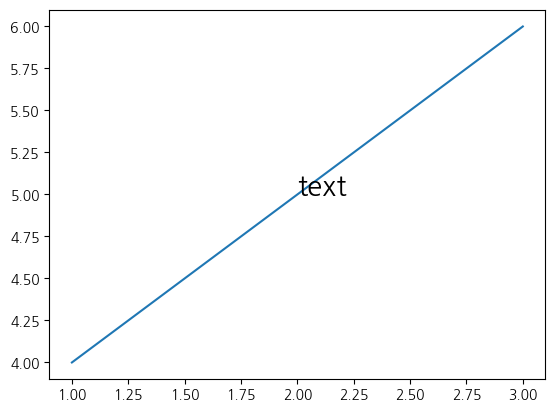

In [27]:
# 그래프에 텍스트 삽입
plt.plot(x, y)
plt.text(2, 5,'text',fontsize = 20)
plt.show()

## Linegraph

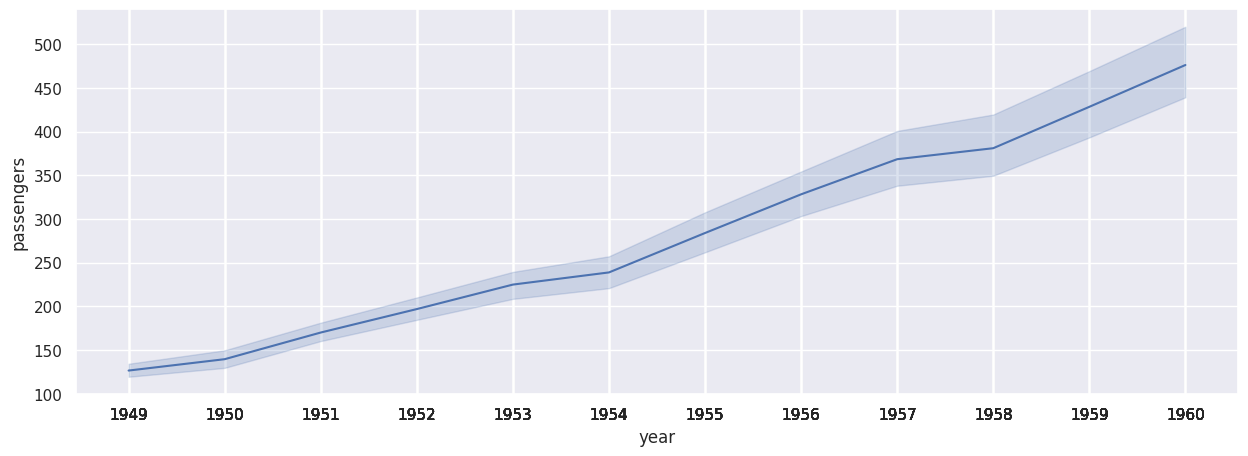

In [122]:
df = sns.load_dataset('flights')

# 선도표 그리기
sns.lineplot(data = df, x = 'year', y = 'passengers')
# xtick에 전체 년도 표시
plt.xticks(df['year']);

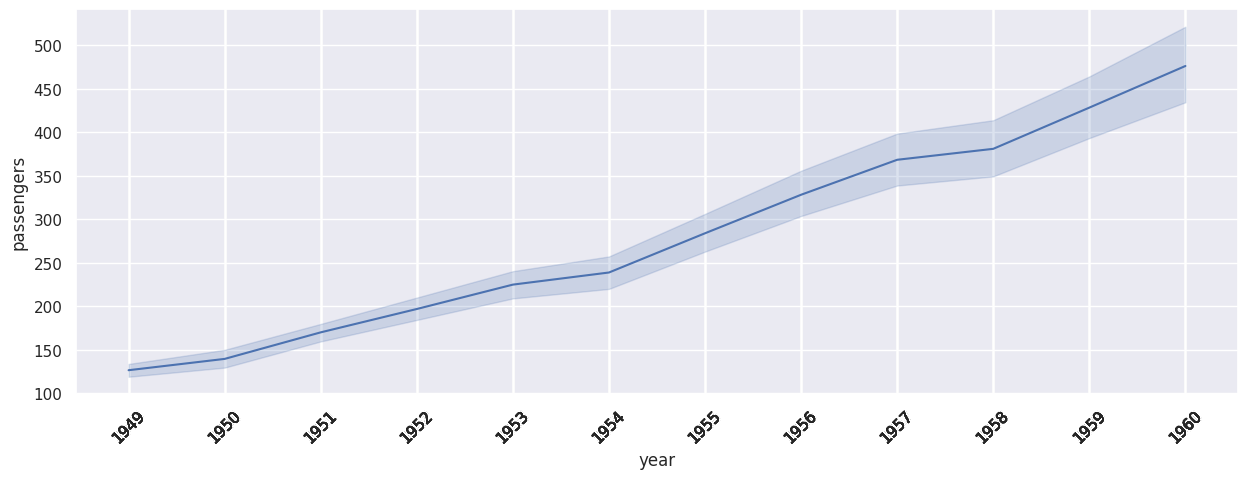

In [123]:
# 선도표 그리기
sns.lineplot(data = df, x = 'year', y = 'passengers')
# xtick에 전체 년도 표시
plt.xticks(df['year'])

# xtick 기울기 추가
plt.xticks(df['year'], rotation = 45);

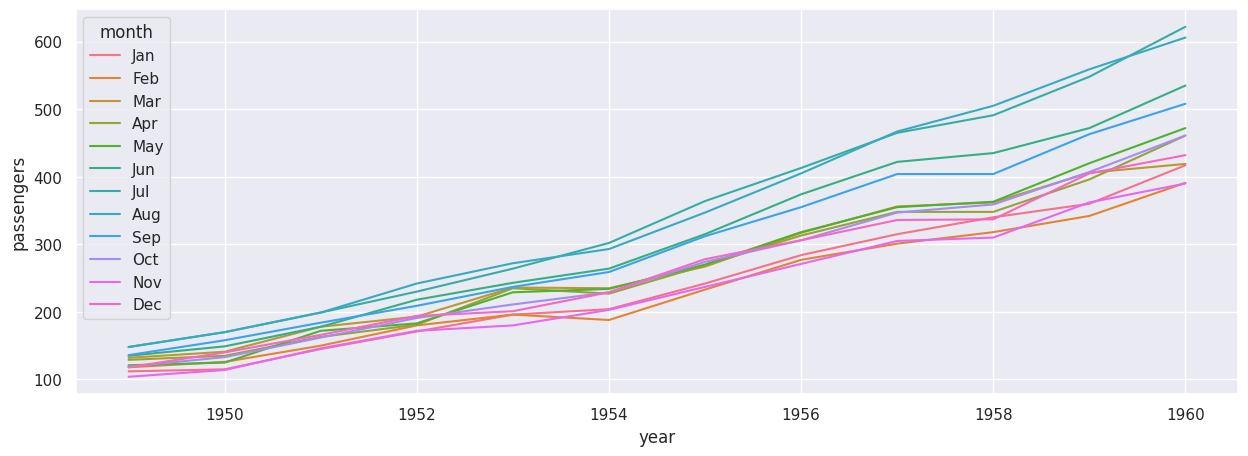

In [124]:
# 월별 구하기
sns.lineplot(data = df, x = 'year', y = 'passengers', hue = 'month');

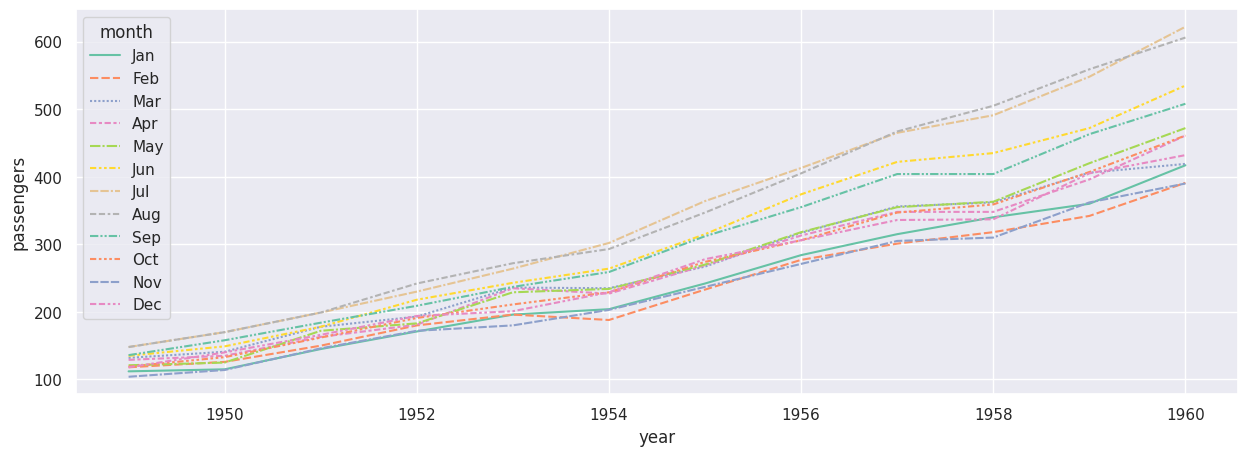

In [125]:
# 색상 변경, 선표현방법
sns.lineplot(data = df, x = 'year', y = 'passengers', hue = 'month', palette = 'Set2', style = 'month');

## Bargraph

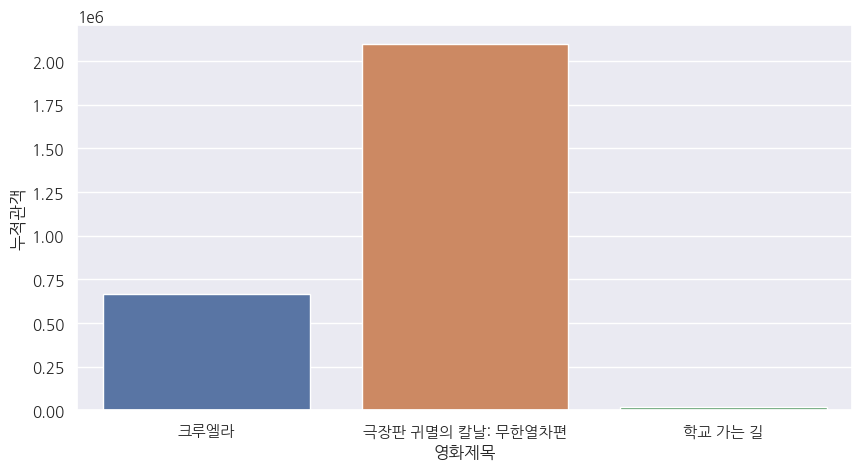

In [41]:
import seaborn as sns
import pandas as pd

plt.rcParams['font.family']=['NanumGothic']
plt.rcParams['axes.unicode_minus'] = False

# 막대그래프
movie_title = ['크루엘라', '극장판 귀멸의 칼날: 무한열차편', '학교 가는 길']
audience = [664308, 2099131, 20067]

data = {'영화제목' : movie_title, '누적관객' : audience}
df = pd.DataFrame(data)

sns.barplot(data = df, x = '영화제목', y = '누적관객')
plt.show()

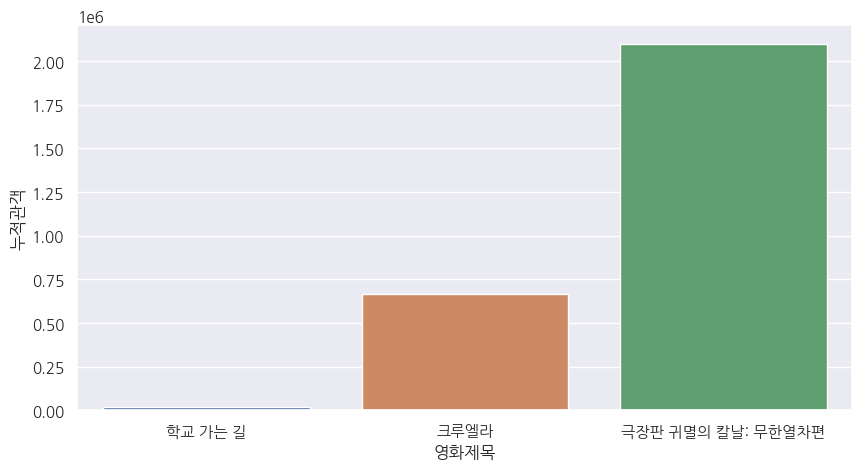

In [43]:
# 누적관객수 별로 그리기
sns.barplot(data = df, x = '영화제목', y = '누적관객',
							order = df.sort_values('누적관객').영화제목)
plt.show()

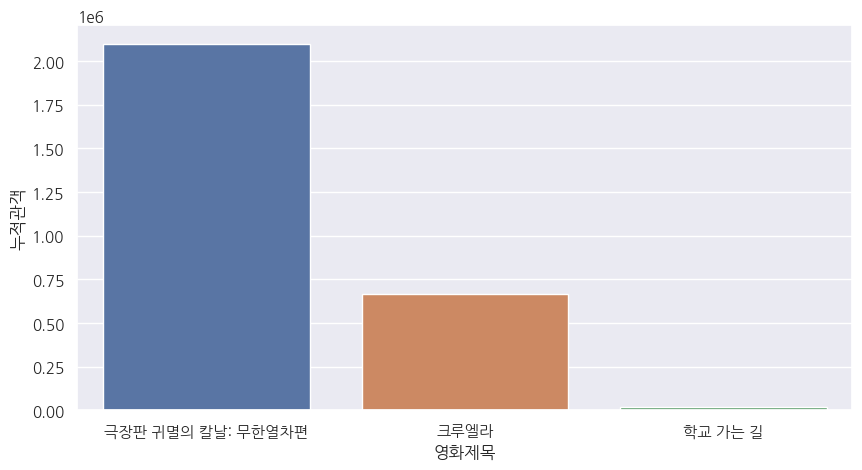

In [47]:
# 내림차순
sns.barplot(data = df, x = '영화제목', y = '누적관객',
							order = df.sort_values('누적관객', ascending = False).영화제목)
plt.show()

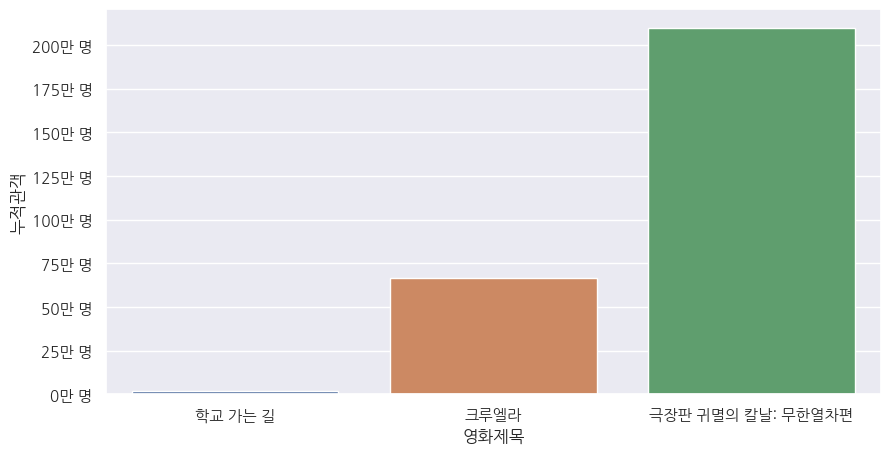

In [50]:
import matplotlib.ticker as mticker

# df는 Pandas DataFrame입니다.
# df.plot()을 사용하여 플롯을 생성합니다.
ax = sns.barplot(data = df, x = '영화제목', y = '누적관객',
							order = df.sort_values('누적관객').영화제목)

# Matplotlib의 축 객체에서 y축 눈금을 얻습니다.
ticks_labels = ax.get_yticks().tolist()

# 경고문 없이 y축 눈금을 고정합니다.
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_labels))

# y축 레이블을 '만 명' 단위로 포맷팅합니다.
ylabels = ['{:,.0f}'.format(x) + '만 명' for x in ax.get_yticks() / 10000]

# y축 레이블을 업데이트합니다.
ax.set_yticklabels(ylabels)

# 필요한 경우 그래프를 보여주기 위한 코드
plt.show()

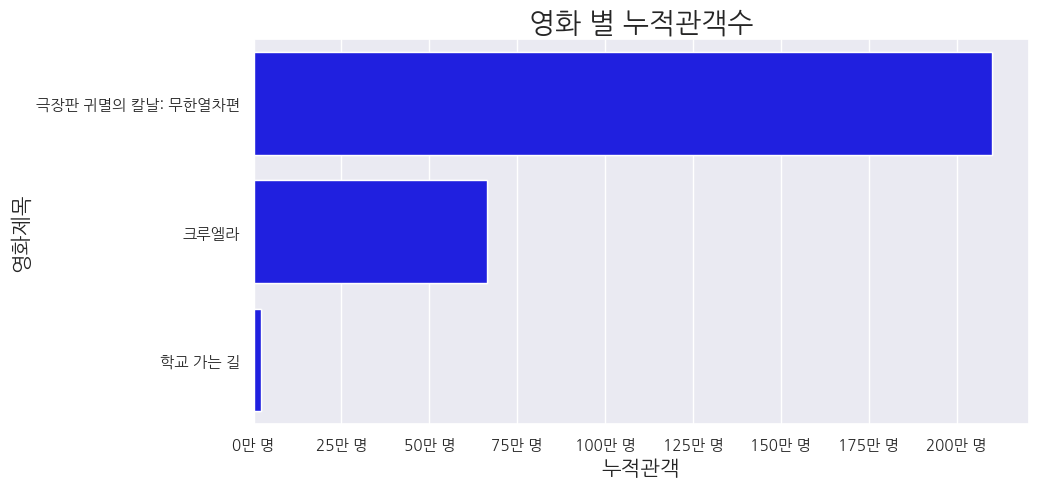

In [54]:
# 가로로 그리기
chart = sns.barplot(data = df, x = '누적관객', y = '영화제목',
             order = df.sort_values('누적관객', ascending = False).영화제목, color = 'blue')

xlabels = ['{:,.0f}'.format(i) + '만 명' for i in chart.get_xticks() / 10000]
chart.set_xticklabels(xlabels)

# 제목추가, 폰트 사이즈 변경
chart = sns.barplot(data = df, x = '누적관객', y = '영화제목',
             order = df.sort_values('누적관객', ascending = False).영화제목,
             color = 'blue')

xlabels = ['{:,.0f}'.format(i) + '만 명' for i in chart.get_xticks() / 10000]
chart.set_xticklabels(xlabels)

plt.xlabel('누적관객', fontsize = 15)
plt.ylabel('영화제목', fontsize = 15)
plt.title('영화 별 누적관객수', fontsize = 20)
plt.show()

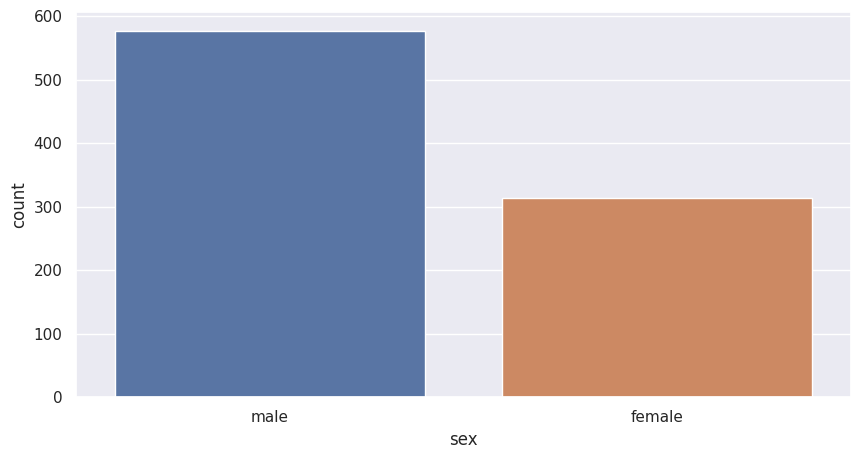

In [66]:
df = sns.load_dataset('titanic')

# sex groupping
df.groupby(by = 'sex').count()

sns.countplot(data = df, x = 'sex')
plt.show()

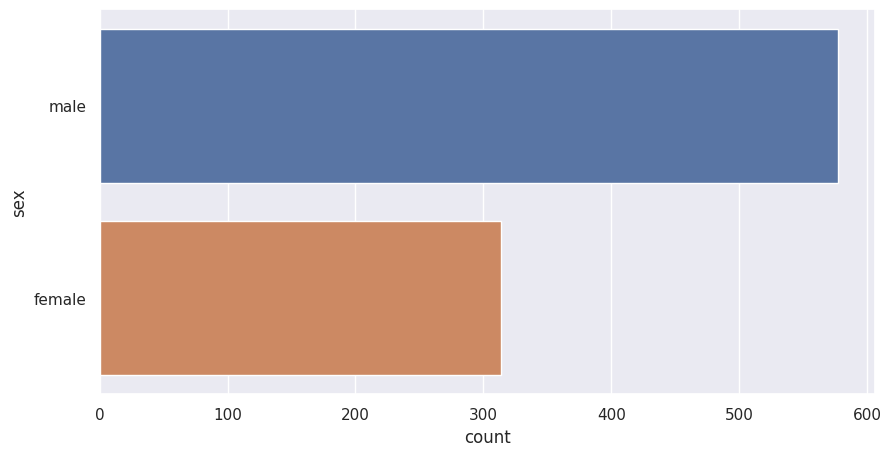

In [68]:
# 가로
sns.countplot(data = df, y = 'sex')
plt.show()

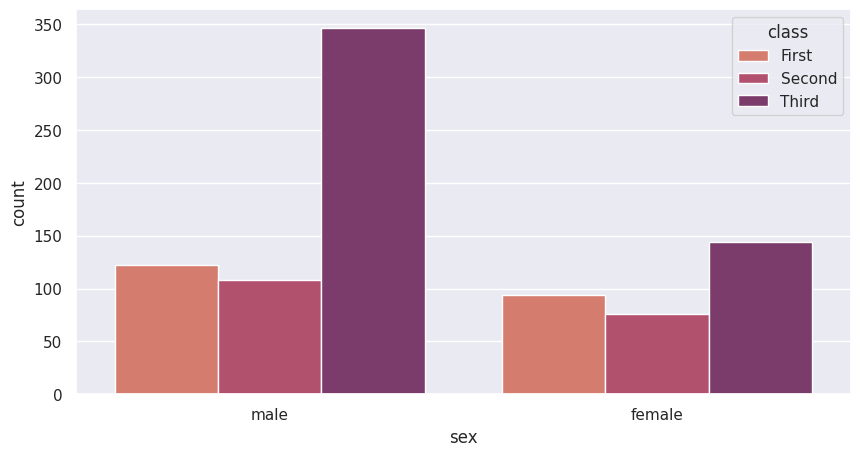

In [70]:
# 타이타닉 데이터 셋의 성별 인원수를 객실 등급별로 시각화 하시오.
df[['sex', 'class']]
df.groupby(by = ['sex', 'class'])['sex'].count()
sns.countplot(data =df, x = 'sex', hue = 'class', palette = 'flare') # hue : categroy , palette : color
plt.show()

## Boxplot

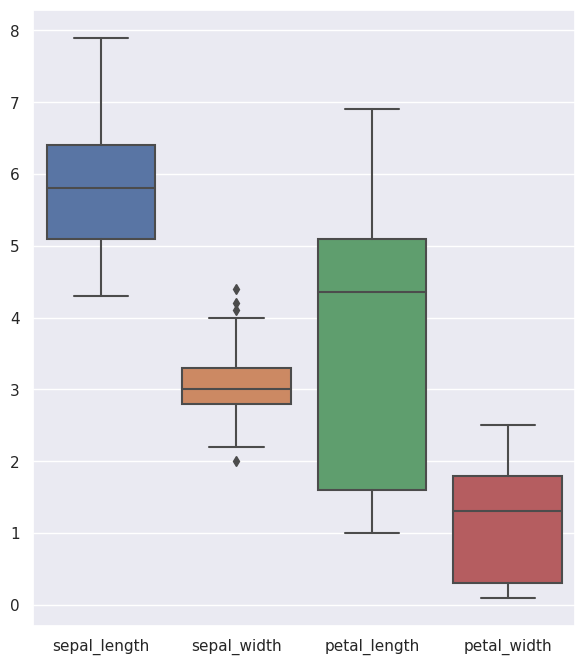

In [58]:
df = sns.load_dataset('iris')

# 그림(세로) 키우기
plt.subplots(figsize = (7,8))
sns.boxplot(data = df)
plt.show()

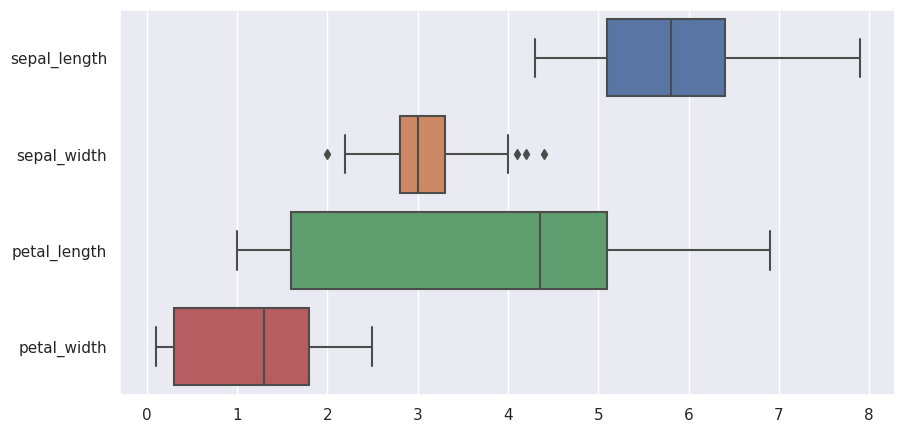

In [59]:
# 가로 방향
sns.boxplot(data = df, orient = 'h')
plt.show()

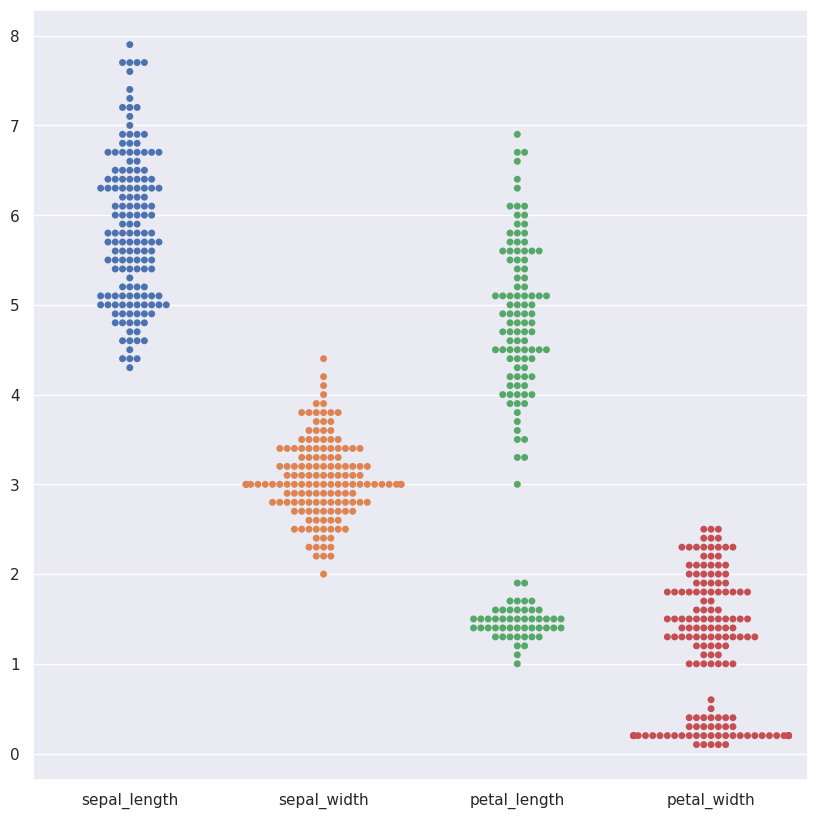

In [60]:
# swarmplot( 나무-잎 모양)
plt.subplots(figsize = (10, 10))
sns.swarmplot(data = df)
plt.show()

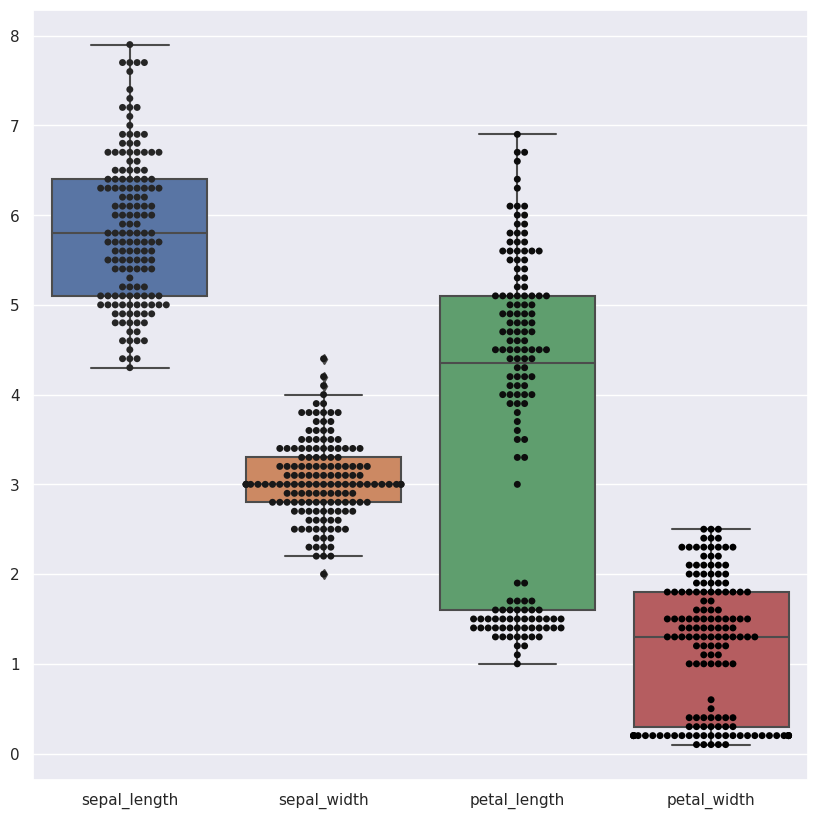

In [64]:
# 겹쳐그리기
plt.subplots(figsize = (10, 10))
sns.boxplot(data = df)
sns.swarmplot(data = df, color = 'black');
plt.show()

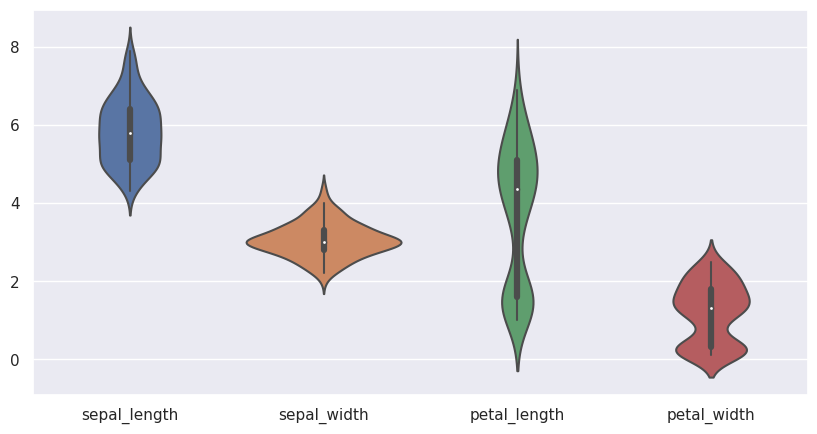

In [62]:
# violineplot(바이올린 모양)
sns.violinplot(data = df)
plt.show()

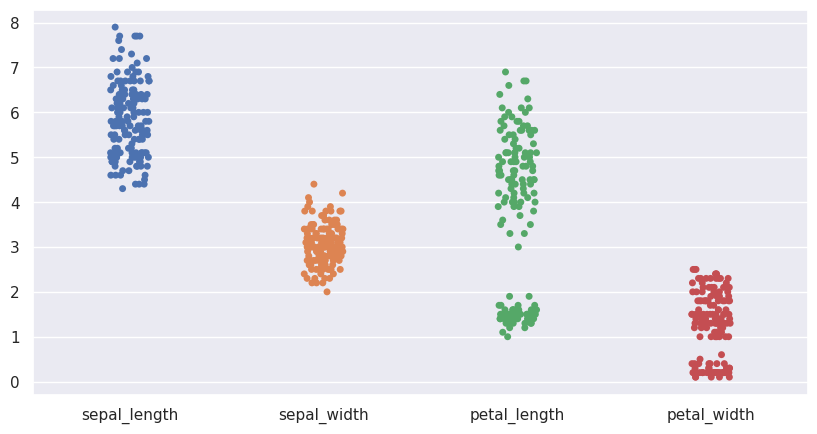

In [63]:
# 점으로 밀집도
sns.stripplot(data = df)
plt.show()

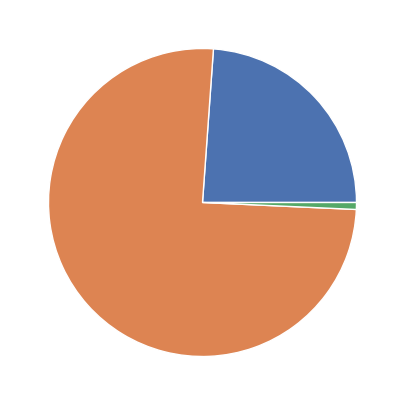

In [71]:
movie_title = ['크루엘라', '극장판 귀멸의 칼날: 무한열차편', '학교 가는 길']
audience = [664308, 2099131, 20067]

data = {'영화제목' : movie_title, '누적관객' : audience}
df = pd.DataFrame(data)

# pie chart
plt.pie(df['누적관객']);

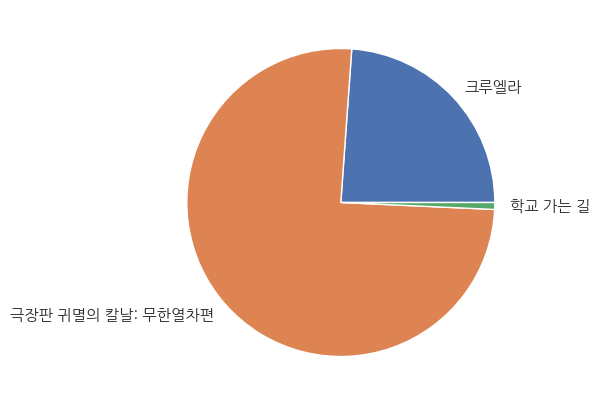

In [75]:
plt.rcParams['font.family']=['NanumGothic']
plt.rcParams['axes.unicode_minus'] = False
# labeling
plt.pie(df['누적관객'], labels = df['영화제목']);

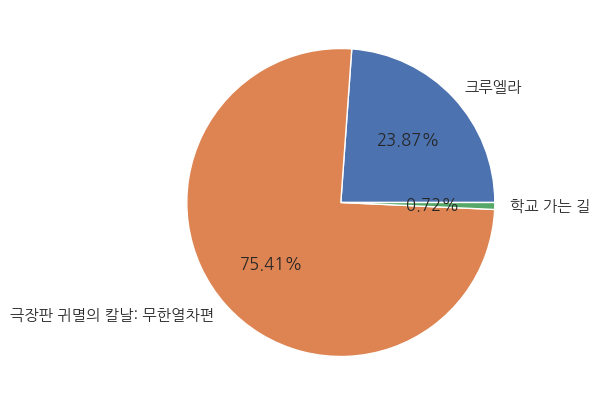

In [76]:
# value
plt.pie(df['누적관객'], labels = df['영화제목'], autopct = '%0.2f%%');

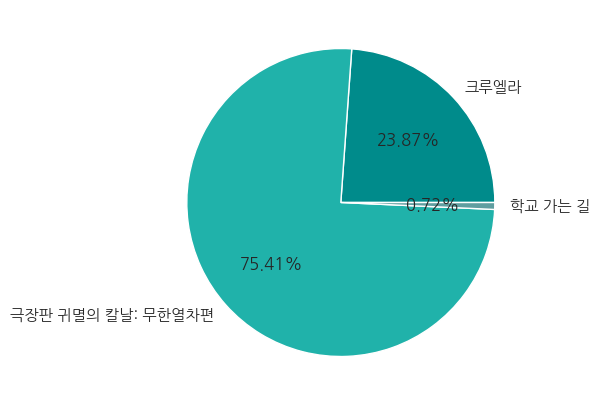

In [81]:
# colors # https://m.blog.naver.com/hellonami/30189427178
color_list = ['#008B8B','#20B2AA','#5F9EA0']
plt.pie(df['누적관객'], labels = df['영화제목'], autopct = '%0.2f%%', colors = color_list);

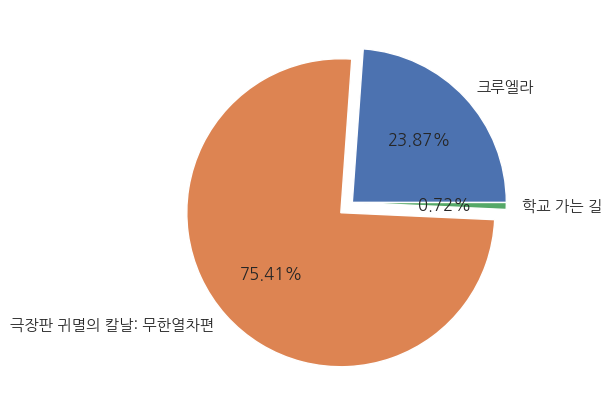

In [83]:
# explode 분리
explode_list = [0, 0.1, 0]
plt.pie(df['누적관객'], labels = df['영화제목'], autopct = '%0.2f%%', explode = explode_list);

## Histogram

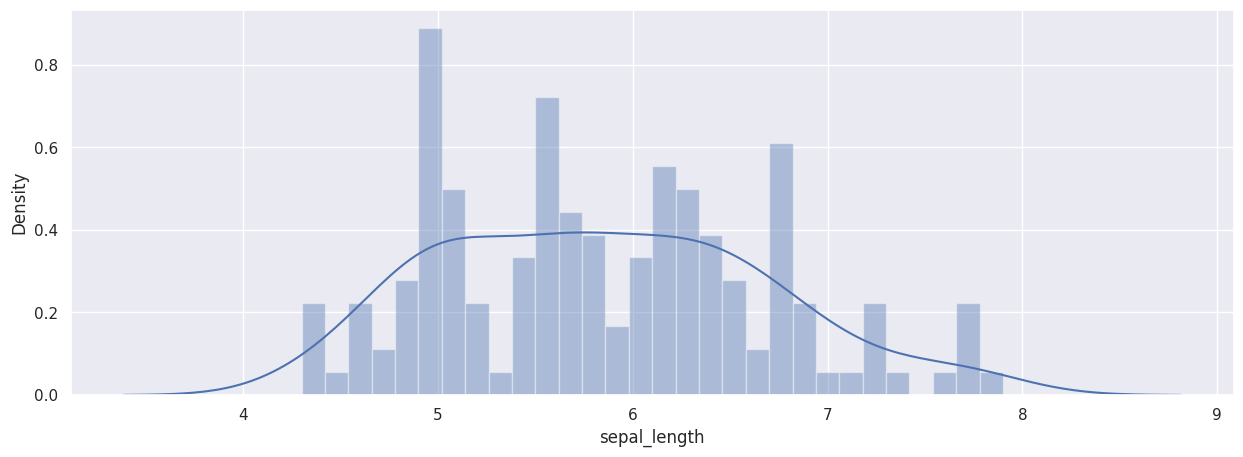

In [86]:
sns.set(rc={'figure.figsize':(15, 5)})

df = sns.load_dataset('iris')
# displot
sns.distplot(df['sepal_length'], bins = 30); # bins : 구간갯수 설정

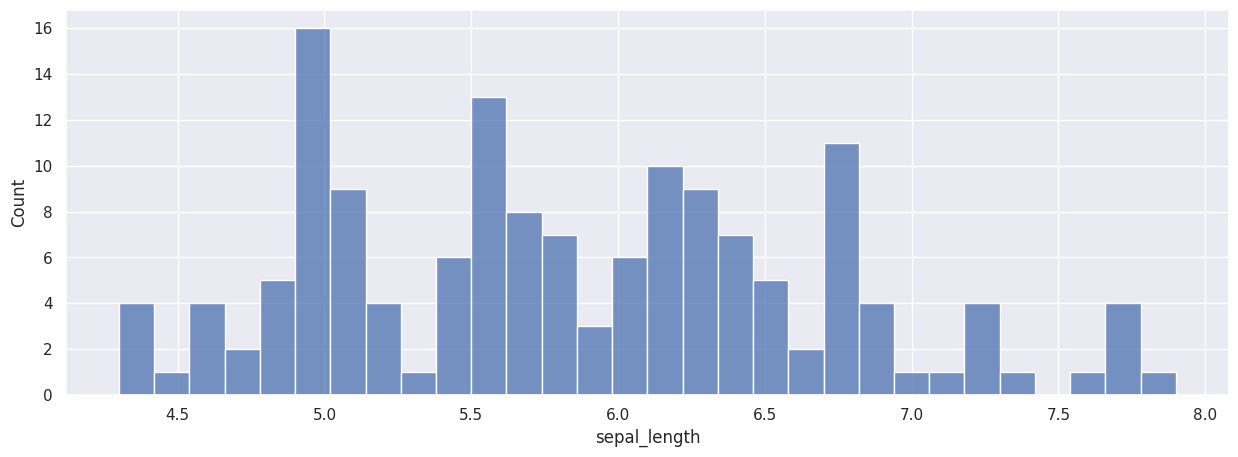

In [87]:
# histplot
sns.histplot(df['sepal_length'], bins =30, kde = False); # kde : 선추가

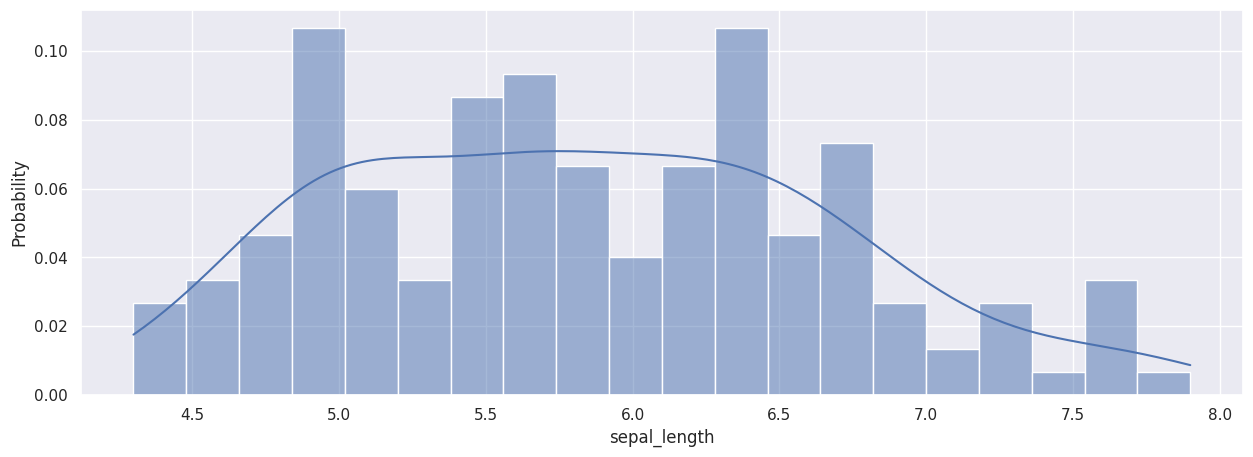

In [91]:
# count -> probability
sns.histplot(df['sepal_length'], bins = 20, kde = True, stat = 'probability');

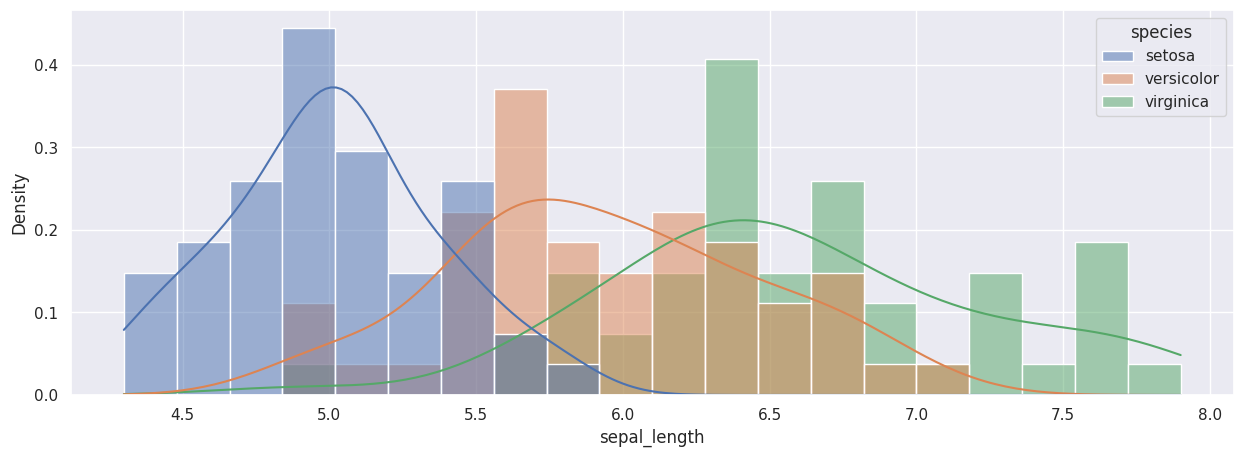

In [96]:
# 카테고리 별 분류 (x -> y)
sns.histplot(data = df, x = 'sepal_length', bins = 20, kde = True, stat = 'density', hue = 'species');

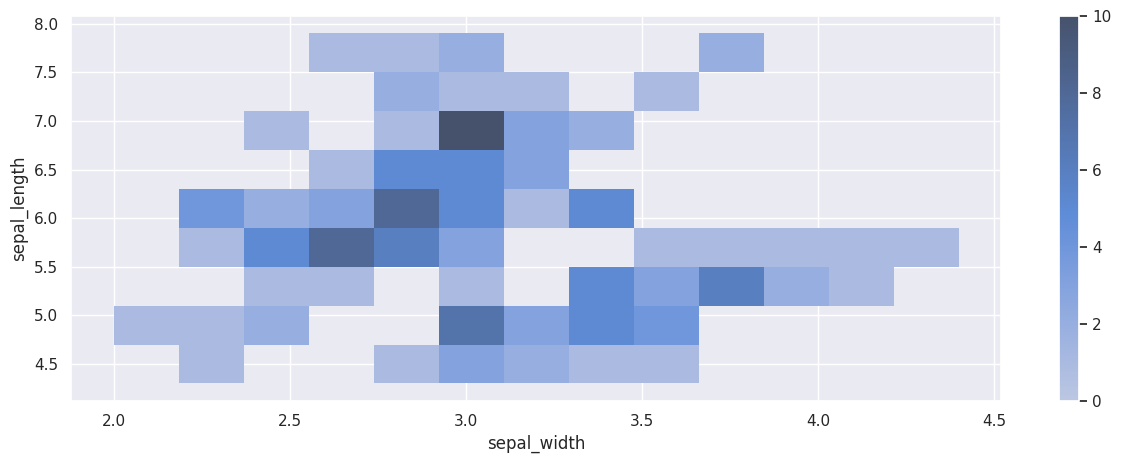

In [98]:
# heatmap 형식
sns.histplot(data = df, y = 'sepal_length', x = 'sepal_width', cbar = True); # cbar : 색상 숫자

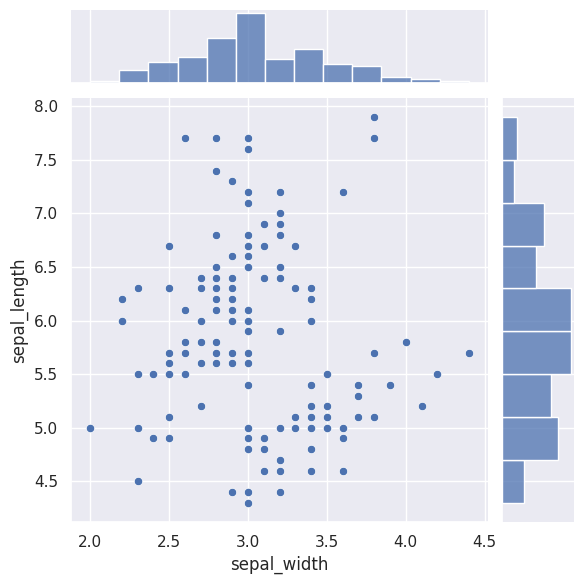

In [99]:
# joinplot
sns.jointplot(data = df,  x = 'sepal_width', y = 'sepal_length');

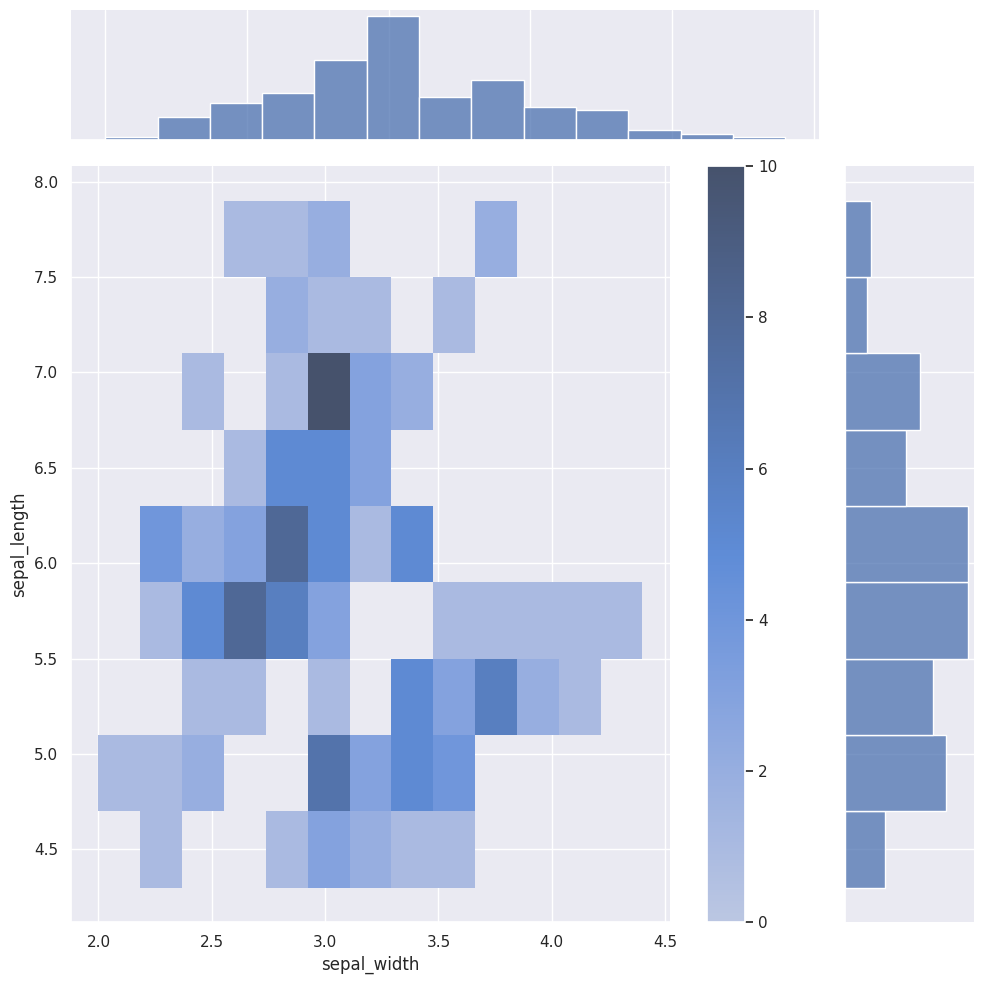

In [100]:
# joinplot + histgram
sns.jointplot(data = df,  x = 'sepal_width', y = 'sepal_length', kind = 'hist', cbar = True, height = 10);
# height : 크기 조절

## Heatmap

In [101]:
df = sns.load_dataset('flights')
# 각 년도별 월별 승객수를 히트맵으로 나타내시오.
pivot_data = df.pivot('month', 'year', 'passengers')
pivot_data

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


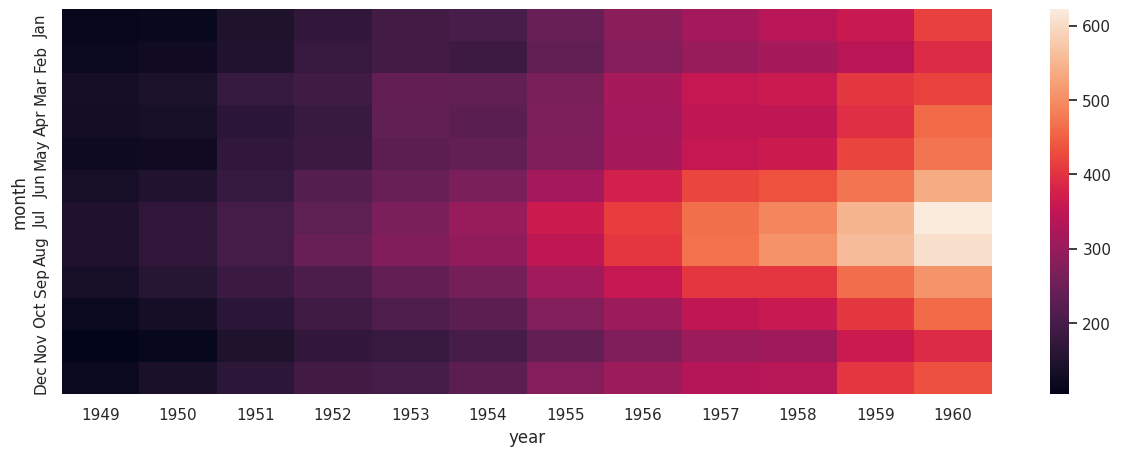

In [103]:
# heatmap
sns.heatmap(pivot_data);

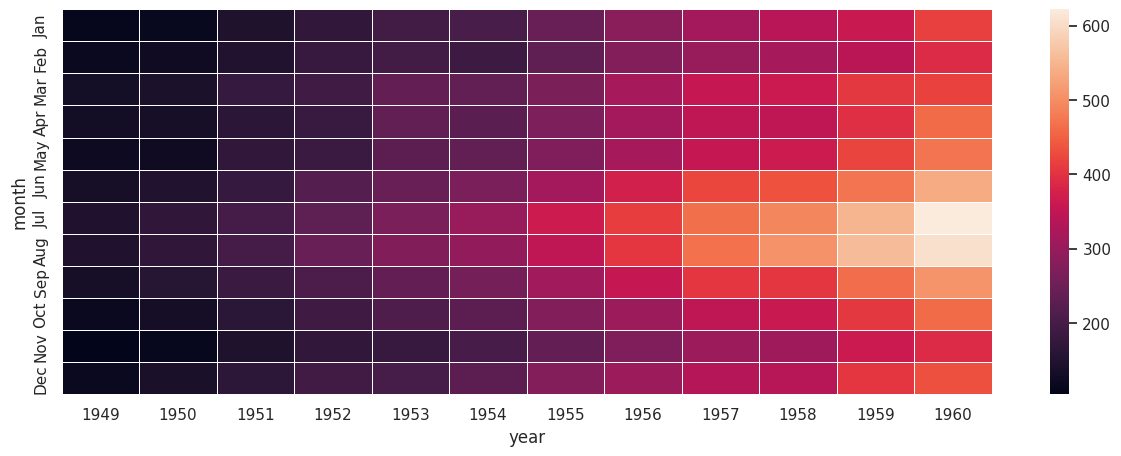

In [105]:
# 격자선
sns.heatmap(pivot_data, linewidths = .5);

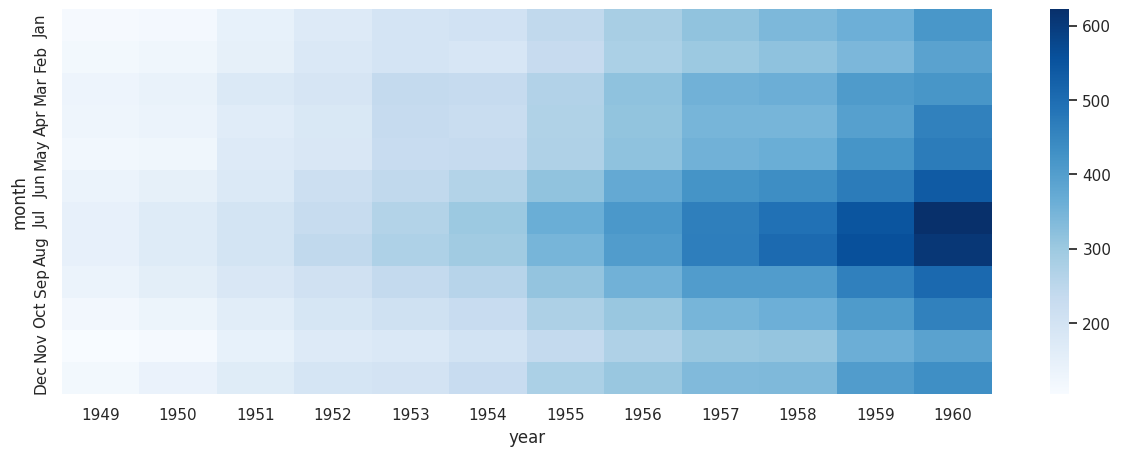

In [107]:
# cmap을 통한 colorbar 색상 변경
sns.heatmap(pivot_data, cmap = 'Blues');

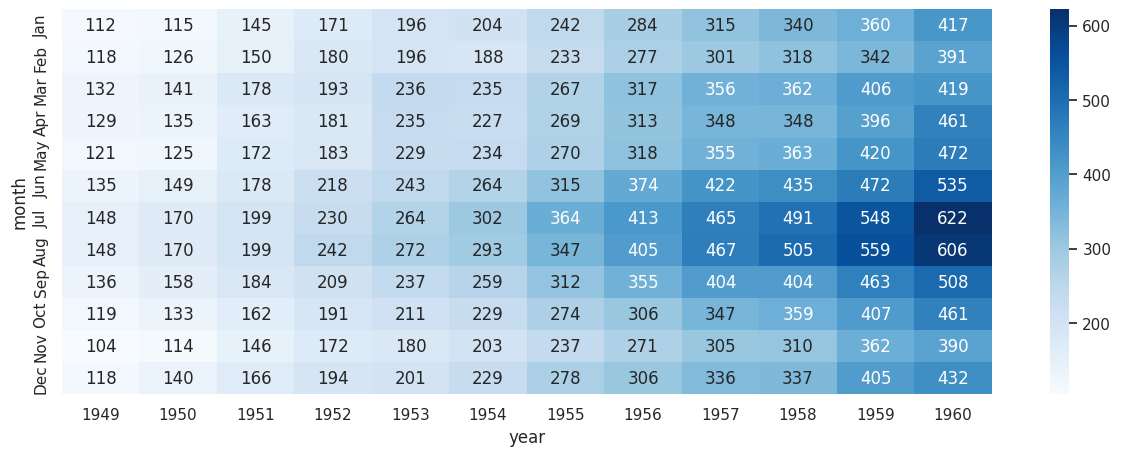

In [109]:
# 수치로 변환 후 정수 형태로
sns.heatmap(pivot_data, cmap="Blues", annot = True, fmt = 'd');

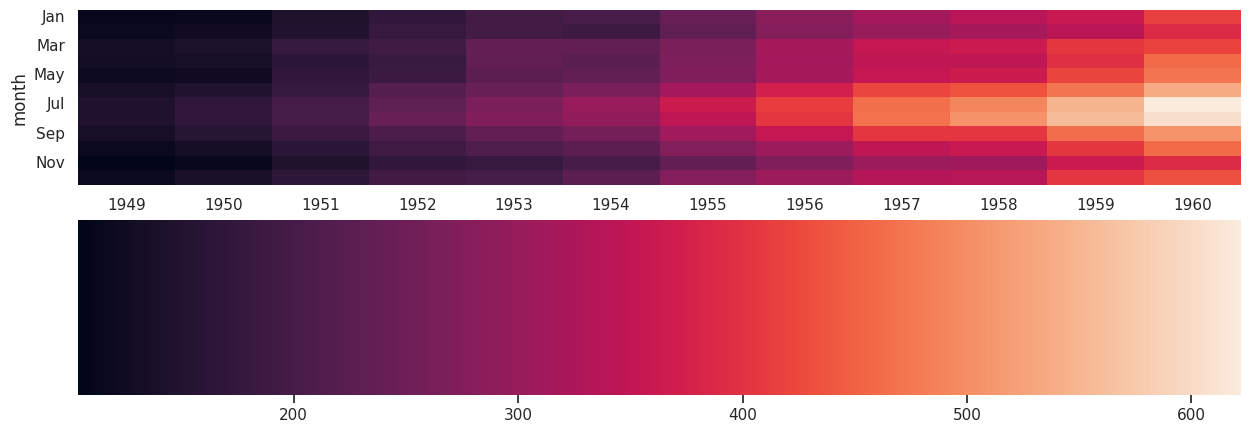

In [111]:
# colorbar 가로로 놓기
fig, (ax, cbar_ax) = plt.subplots(2)
ax = sns.heatmap(pivot_data, ax = ax,
									cbar_ax=cbar_ax,
									cbar_kws={'orientation':'horizontal'});

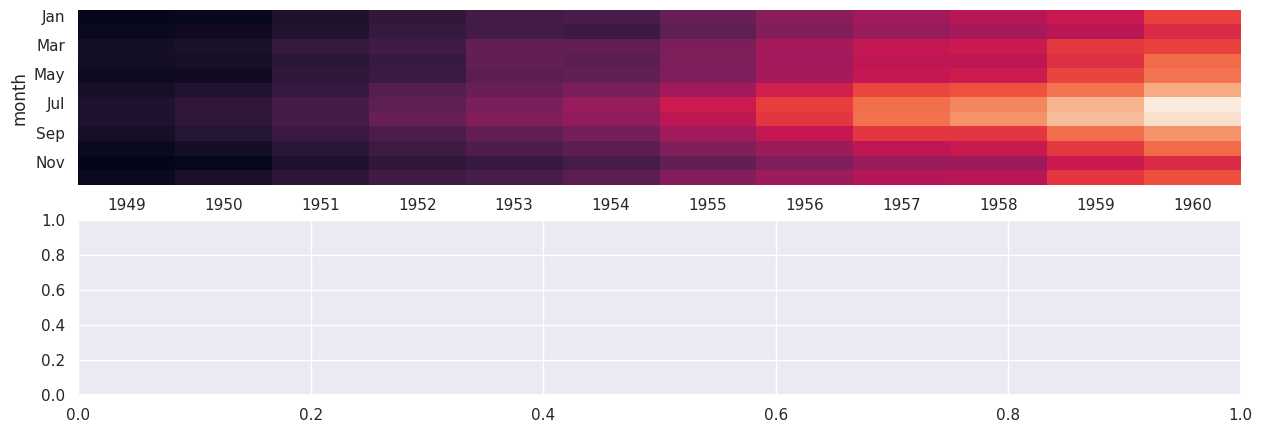

In [112]:
# colorbar 세로로 놓기
fig, (ax, fcbar_ax) = plt.subplots(2)
ax = sns.heatmap(pivot_data, ax = ax,
									cbar_ax=cbar_ax,
									cbar_kws={'orientation':'vertical'})

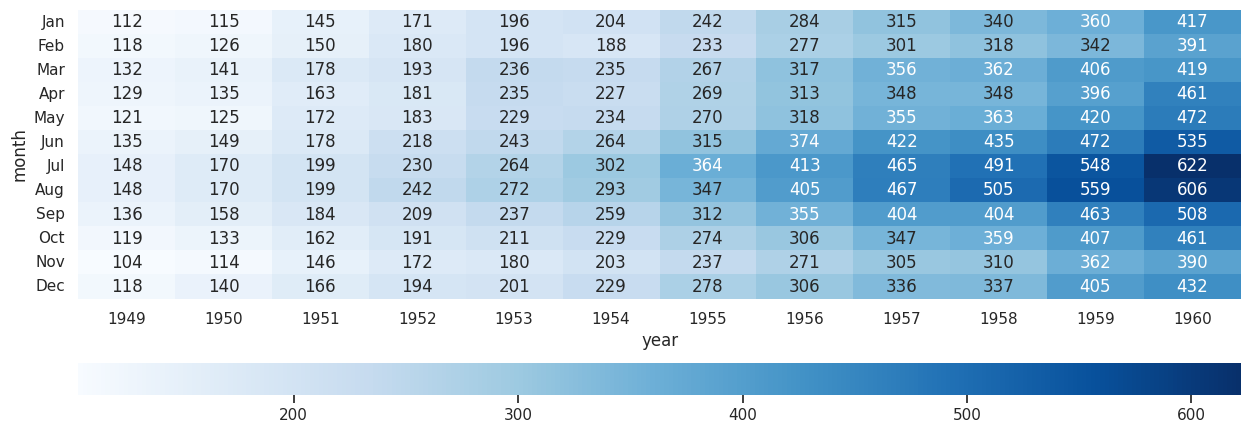

In [115]:
# 레이아웃 조정
grid_kws = {"height_ratios": (.9, .1), "hspace": 0.4}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)

# 히트맵 그리기
ax = sns.heatmap(pivot_data, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={'orientation': 'horizontal'},
                 cmap="Blues",
                 annot=True,
                 fmt='d')

## Scatter plot

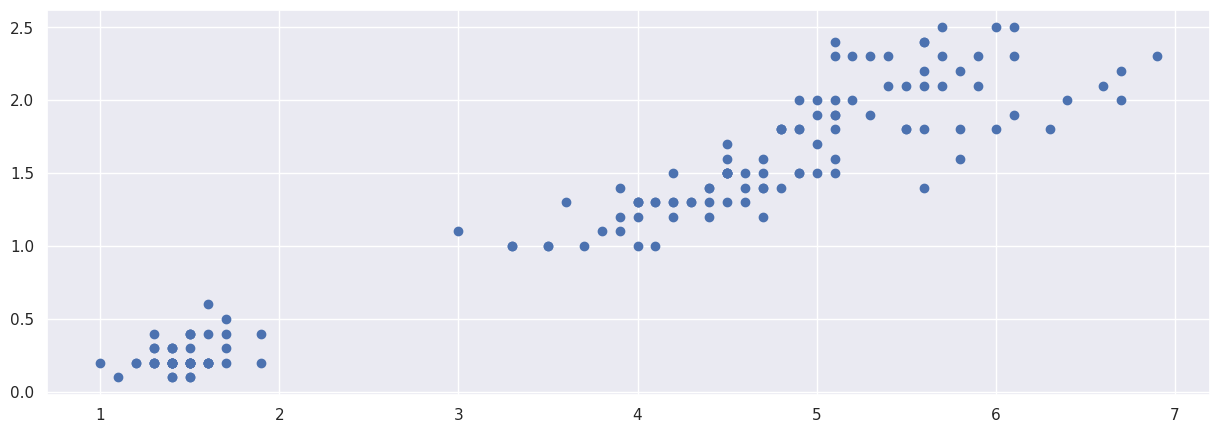

In [118]:
# iris data set
df = sns.load_dataset('iris')

# 산점도
plt.scatter(df['petal_length'],df['petal_width']);

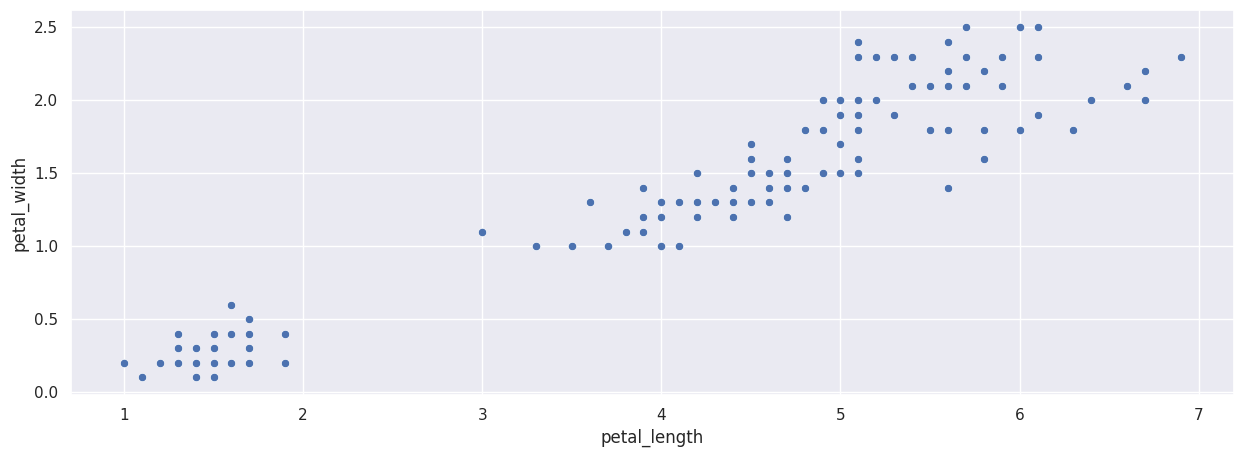

In [119]:
# seaborn
sns.scatterplot(data = df, x ='petal_length', y ='petal_width');

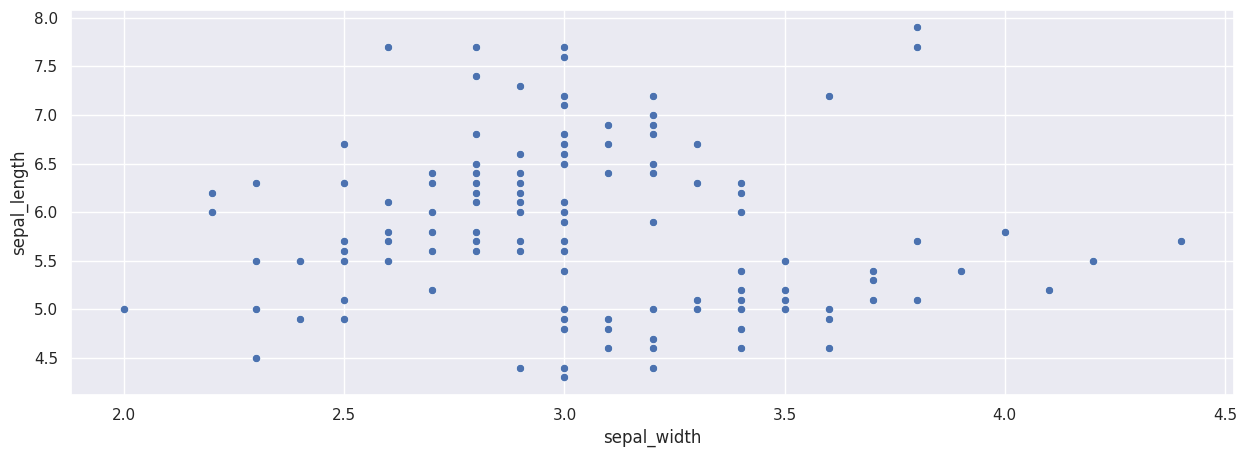

In [126]:
df = sns.load_dataset('iris')

sns.scatterplot(data = df, x = 'sepal_width', y = 'sepal_length');

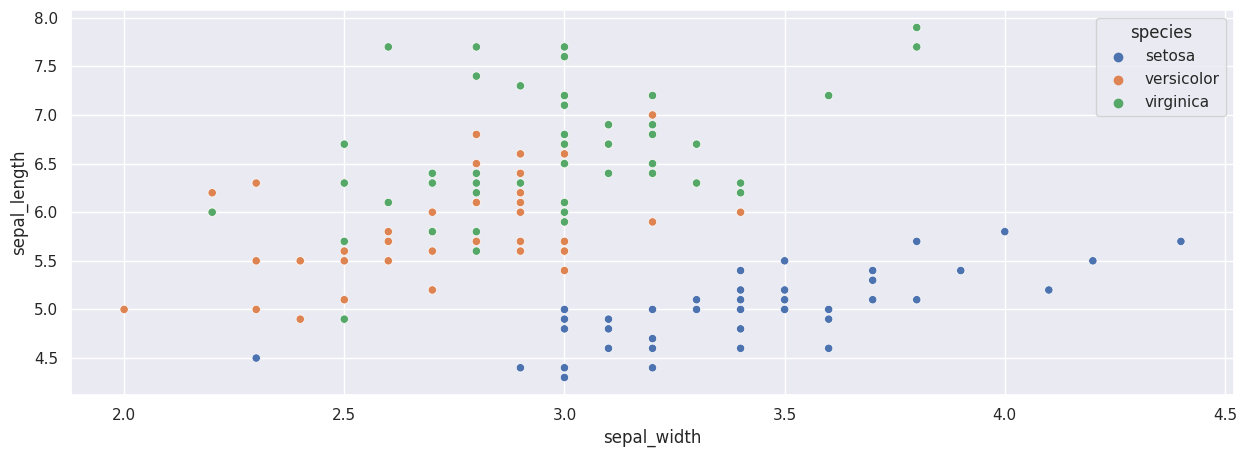

In [127]:
# hue를 이용한 분류
sns.scatterplot(data = df, x = 'sepal_width', y = 'sepal_length', hue = 'species');

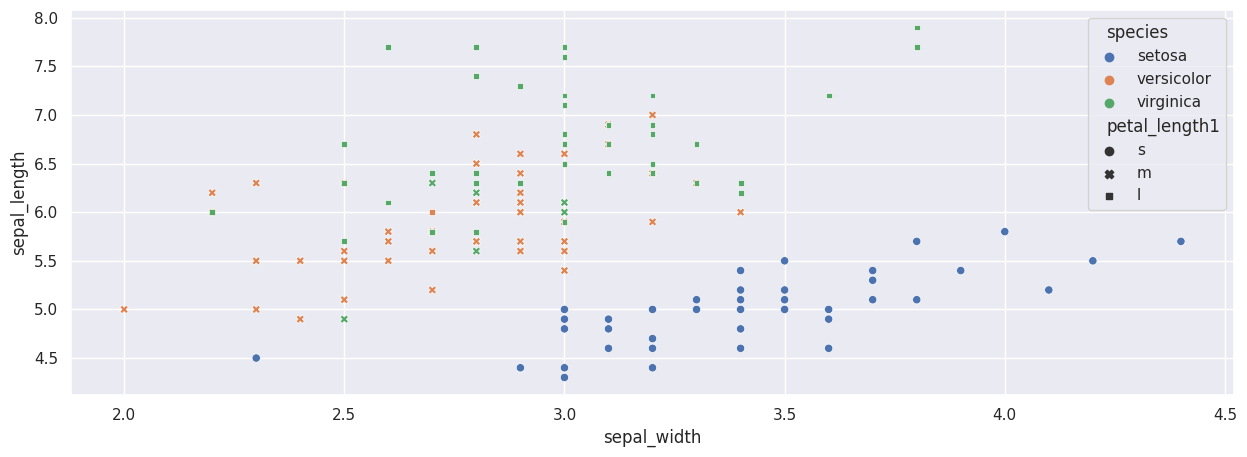

In [130]:
# 3미만, 5미만, 5이상 분류
df['petal_length'].unique()

def function(x):
  if x < 3:
				return 's'
  elif x < 5:
        return 'm'
  else:
        return 'l'

df['petal_length1'] = df['petal_length'].apply(function)

# 스타일
sns.scatterplot(data = df, x = 'sepal_width', y = 'sepal_length', hue = 'species', style = 'petal_length1');

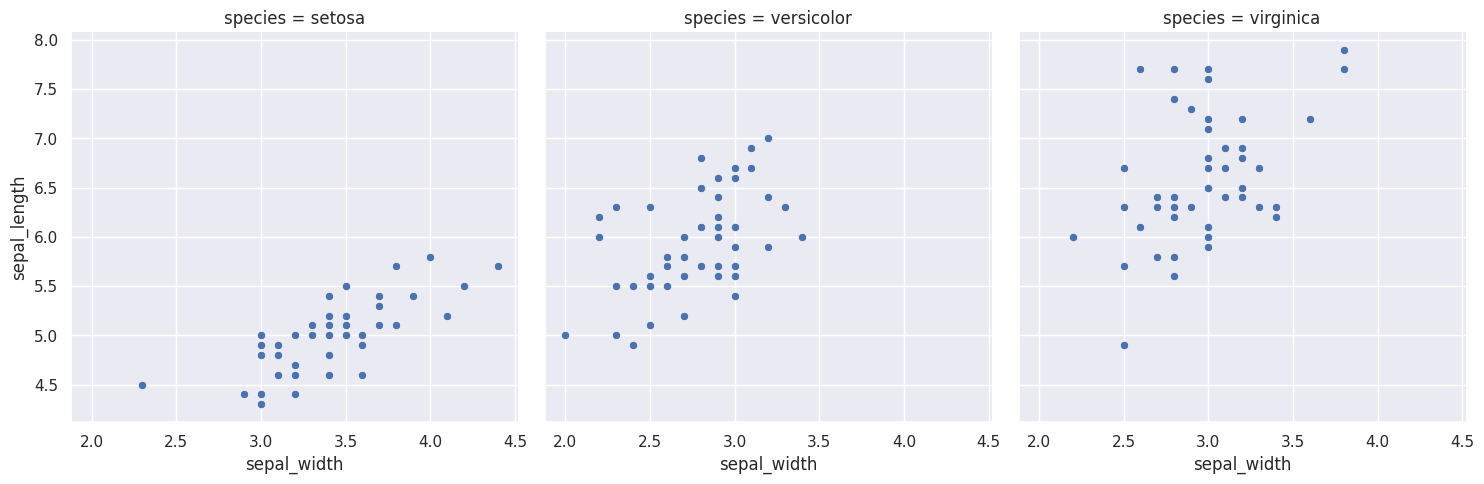

In [131]:
# relplot 카테고리별로
sns.relplot(data = df, x ='sepal_width', y = 'sepal_length', col = 'species');

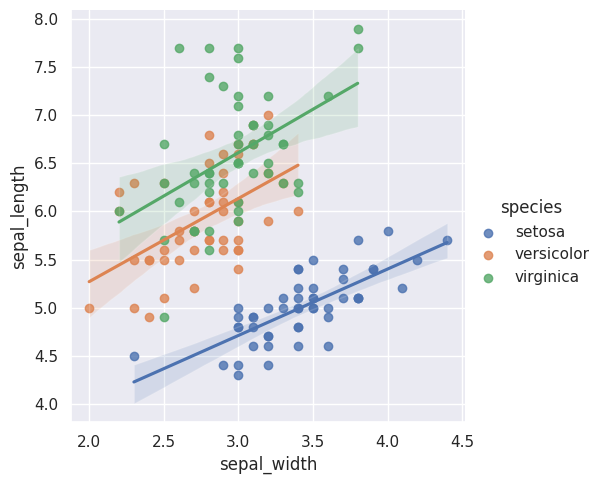

In [132]:
# 회귀선
sns.lmplot(data = df, x = 'sepal_width', y = 'sepal_length', hue = 'species');

## Missing values

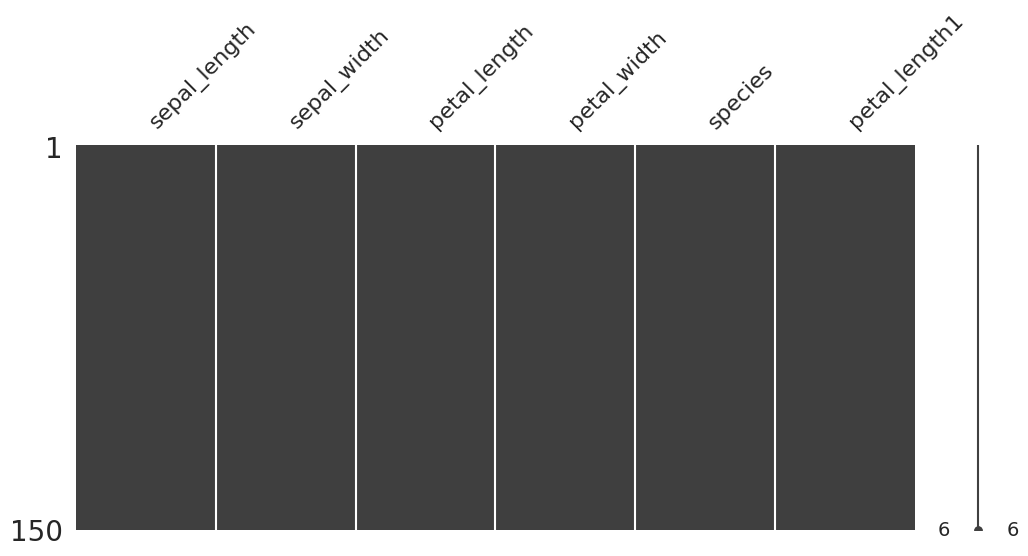

In [134]:
#결측치를 간단하게 시각화 해주는 패키지 사용해보자
import missingno
missingno.matrix(df, figsize =(12,5));

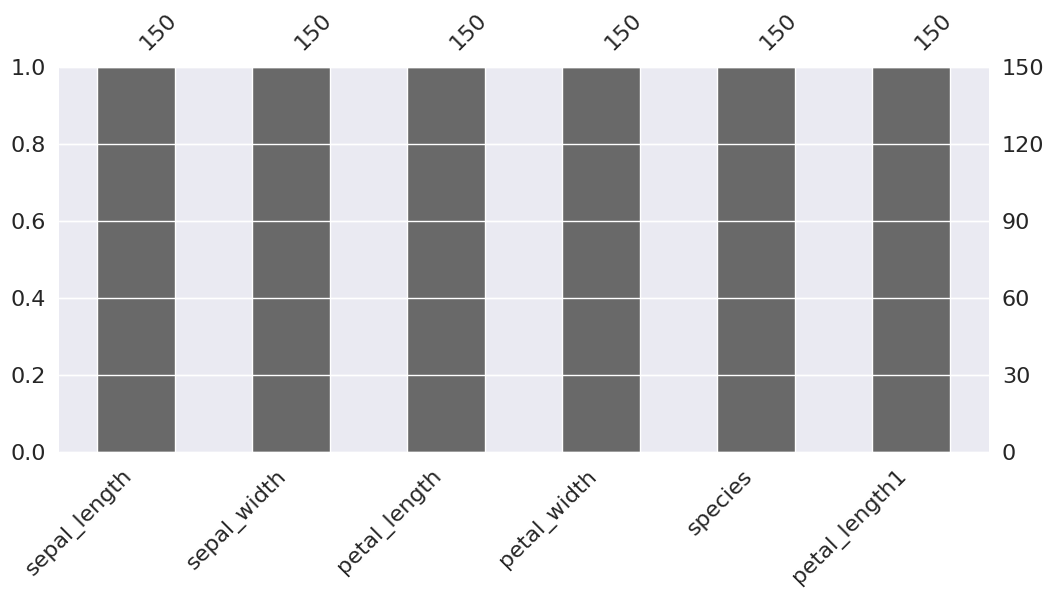

In [136]:
missingno.bar(df, figsize =(12,5));

## Plots

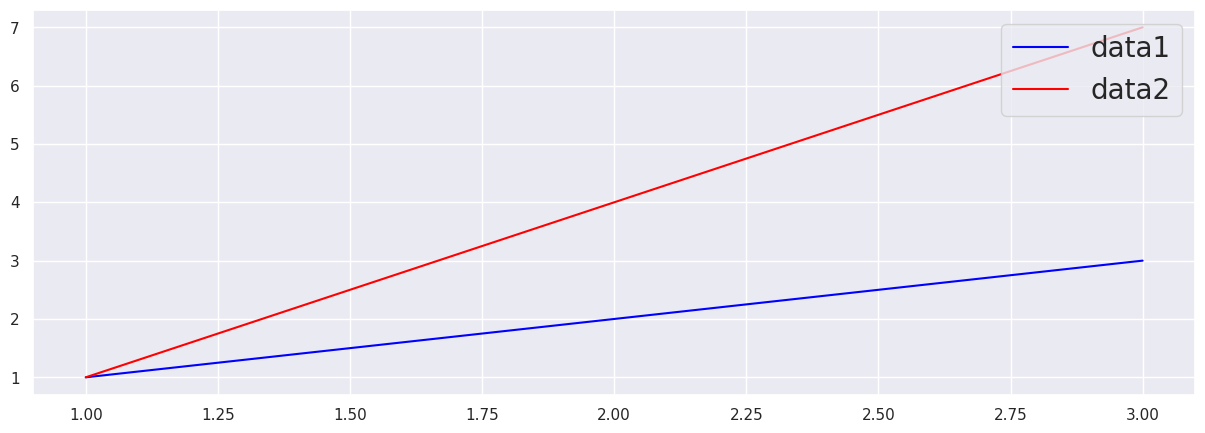

In [143]:
# 여러 차트 한번에 그리기
# data1 x : 1,2,3 y : 1,2,3 data2 x : 1,2,3 y : 1,4,7
x1 = [1,2,3]
y1 = [1,2,3]
x2 = [1,2,3]
y2 = [1,4,7]

plt.plot(x1, y1, color = 'blue' , label = 'data1') # label : 범례 지정
plt.plot(x2, y2, color = 'red', label = 'data2')
plt.legend(['data1','data2'], loc = 'upper right',
						fontsize = 20) # 범례 표시, loc : 위치, # 폰트 크기
plt.show()

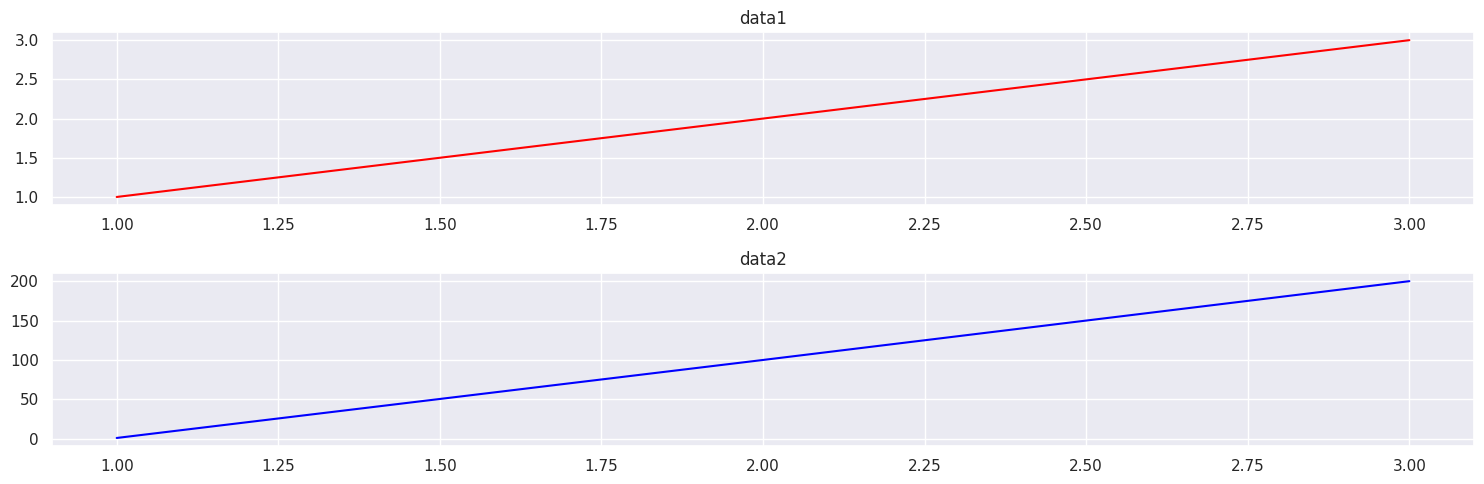

In [145]:
# subplot/subplots를 이용한 여러개의 차트 그리기
x1 = [1, 2, 3]
y1 = [1, 2, 3]
x2 = [1, 2, 3]
y2 = [1, 100, 200]

# subplt(행, 열, 순서)
plt.subplot(1, 2, 1)
plt.plot(x1, y2, color = 'red')
plt.title('data1')

plt.subplot(1, 2, 2)
plt.plot(x2, y2, color = 'blue')
plt.title('data2')

#위아래로 나타나기
plt.subplot(2, 1, 1)
plt.plot(x1, y1, color ='red')
plt.title('data1')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, color = 'blue')
plt.title('data2')

# 문제점 : 그래프가 제목이 겹침
plt.tight_layout() # 이걸로 해결

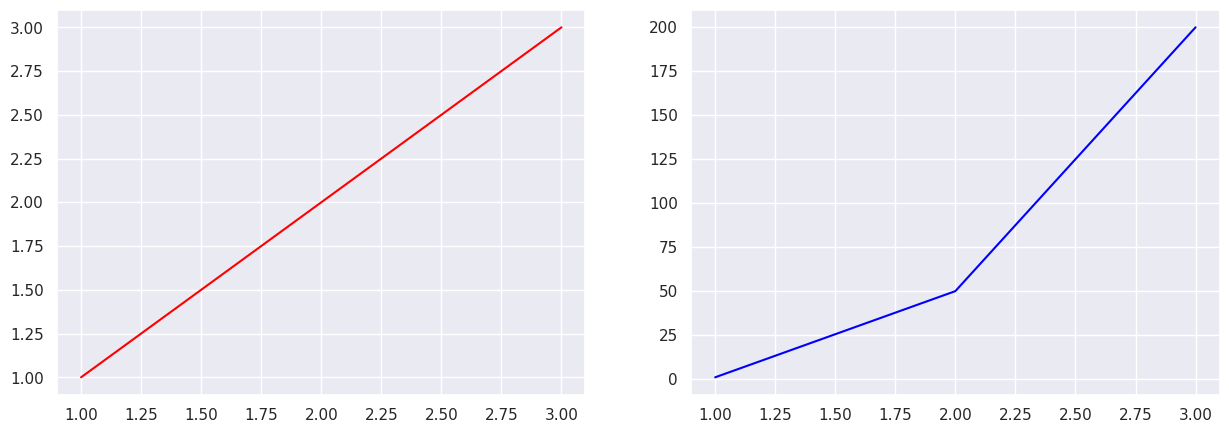

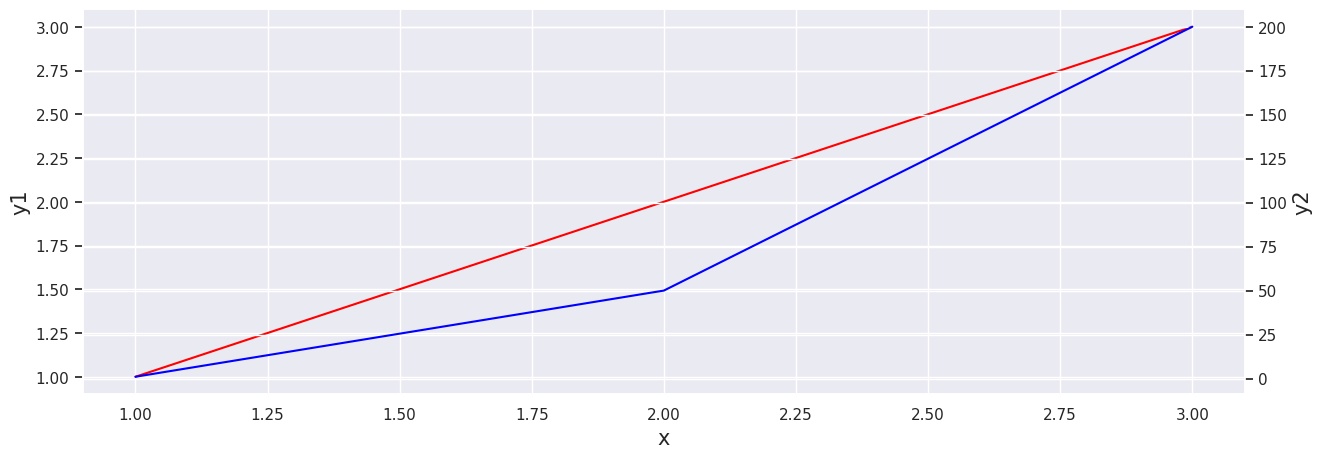

In [151]:
# subplots
fig, axe1 = plt.subplots(nrows = 1, ncols = 2)
# fig # 모형
# axe # 그래프

axe1[0].plot(x1, y1, color = 'red')
axe1[1].plot(x2, y2, color = 'blue')

# data1 , data2을 그래프 출력
x1 = [1,2,3]
y1 = [1,2,3]
x2 = [1,2,3]
y2 = [1,50,200]

fig, axe1 = plt.subplots()

axe2 = axe1.twinx()
axe1.plot(x1, y1, color = 'red', label = 'data1')
axe2.plot(x2, y2, color = 'blue', label = 'data2')

axe1.set_xlabel('x', fontsize = 15)
axe1.set_ylabel('y1', fontsize = 15)
axe2.set_ylabel('y2', fontsize = 15)
plt.show()

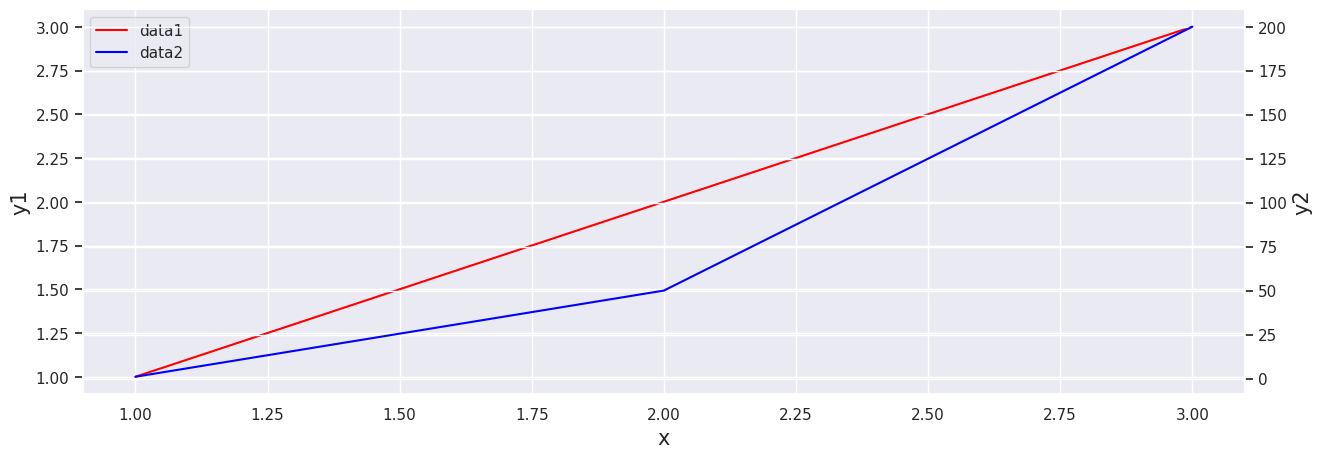

In [153]:
# y축을 두개 가진 차트에서 범례 표시하기
fig, axe1 = plt.subplots()

axe2 = plt.twinx()
chart1 = axe1.plot(x1, y1, color = 'red')
chart2 = axe2.plot(x2, y2, color = 'blue')

axe1.set_xlabel('x', fontsize = 15)
axe1.set_ylabel('y1', fontsize = 15)
axe2.set_ylabel('y2', fontsize = 15)

chart = chart1 + chart2
axe1.legend(chart, ['data1','data2'])
plt.show()

## 3D

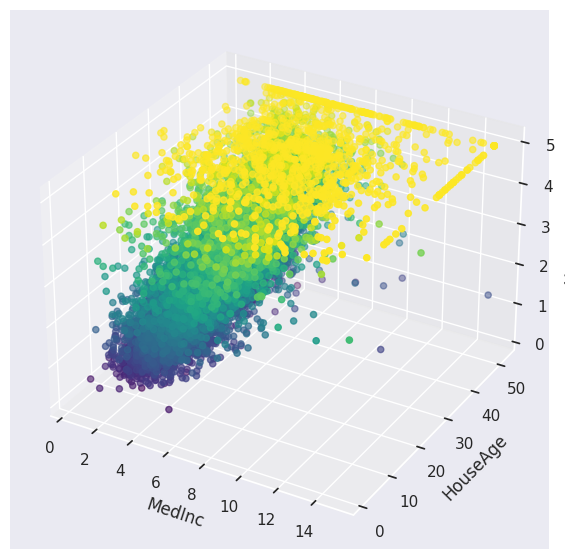

In [141]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_california_housing

# 캘리포니아 주택 데이터셋 로드
housing = fetch_california_housing()
features = housing.data
label = housing.target

# 데이터셋의 처음 두 특성과 타겟 변수 사용
X = features[:, :2]  # 처음 두 특성
y = label

# 3D 산점도 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 데이터 플로팅
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='viridis', marker='o')

# 축 레이블 설정
ax.set_xlabel(housing.feature_names[0])
ax.set_ylabel(housing.feature_names[1])
ax.set_zlabel('House Value')

# 그래프 보여주기
plt.show()

## Map

In [154]:
import json
import folium
import requests
import random

# 서울시 구별 지리 정보 로드
geo_path = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
geo_str = json.loads(requests.get(geo_path).text)

# 랜덤 데이터 생성
data = {district['properties']['name']: random.randint(100, 1000) for district in geo_str['features']}

# Folium을 사용한 지도 생성
map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 지리 정보와 데이터를 결합하여 지도에 시각화
folium.Choropleth(
    geo_data=geo_str,
    data=data,
    columns=[data.keys(), data.values()],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Random Data'
).add_to(map)

map

In [157]:
import plotly.express as px

# 랜덤 데이터 생성
data = pd.DataFrame({
    "구": [district['properties']['name'] for district in geo_str['features']],
    "값": [random.randint(100, 1000) for _ in geo_str['features']]
})

# Plotly를 사용하여 서울시 지도 시각화
fig = px.choropleth(data,
                    geojson=geo_str,
                    locations='구',
                    color='값',
                    featureidkey="properties.name",
                    projection="mercator",
                    color_continuous_scale="Viridis")

fig.update_geos(fitbounds="locations", visible=False)
fig.show()